Questions this analysis intends to answer
-Which director made the most shows?
-Which actor/actress was included in most of the shows?
-Which movie/show is the most watch in each country?


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [44]:
netflix_dataset = pd.read_csv("netflix_titles.csv")


def plot_data(xaxis,yaxis,title):
    plt.figure(figsize=(8,5))
    sns.barplot(x=xaxis,y=yaxis)
    plt.xticks(rotation=90)
    plt.title(title,color = 'blue',fontsize=20)
    plt.show()
    
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Data Cleaning and Massaging

In [45]:
#check which columns have null values
netflix_dataset.isnull().sum()

netflix_dataset['director'].mode()

0    Raúl Campos, Jan Suter
dtype: object

In [37]:
#drop the fields that do not have any values and will not have a big effect on the questions that we want to answer
netflix_dataset.dropna(inplace = True) 
netflix_dataset.isnull().sum()



show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Question 1: Who is the director with the most number of movies/shows directed?


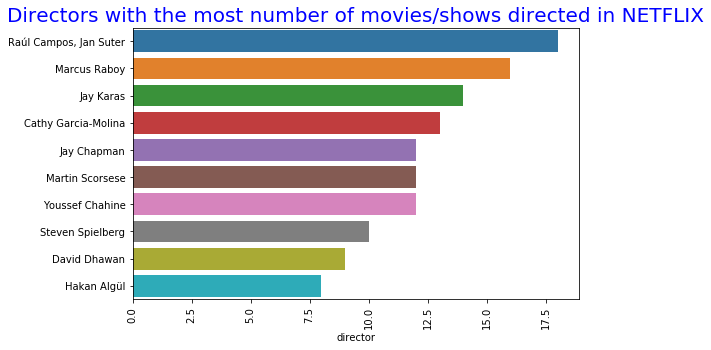

In [32]:
netflix_directors = pd.DataFrame(netflix_dataset['director'].value_counts()).sort_values(by='director',ascending=False)[:10]
plot_data(netflix_directors.director,netflix_directors.index,'Directors with the most number of movies/shows directed in NETFLIX')

# Question 2: Who is the actor casted with the most number of movies/shows?

To answer this question I needed to break the cast column into individual values and map them to the titles column.

In [38]:
title_cast_columns = ["title","cast"]
title_cast_country = ["country","title","cast"]
title_cast_dataset= netflix_dataset[title_cast_columns]
country_title_cast_dataset = netflix_dataset[title_cast_country]

actor_titles_dict = defaultdict(list)
for i in range(len(title_cast_dataset)) : 
  title = title_cast_dataset.iloc[i, 0]
  casts = title_cast_dataset.iloc[i, 1].split(", ") 
  for actor in casts:
      if actor in actor_titles_dict:
          actor_titles_dict[actor].append(title)
      else:
          actor_titles_dict[actor] = [title]
 

actor_titles_count_dict = {}
for actor, titles in actor_titles_dict.items():
    actor_titles_count_dict[actor] = len(titles)
    
top_actors = pd.DataFrame.from_dict(actor_titles_count_dict,orient='index',columns=["Count"])






In [138]:
#let confirm
title_cast_dataset[title_cast_dataset.cast.str.contains('Anupam Kher')].agg({"title":"count"})


title    41
dtype: int64

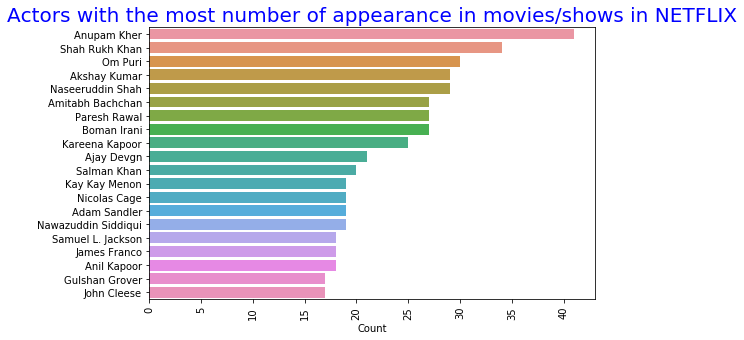

In [39]:
top_actors = top_actors.sort_values(by='Count',ascending=False)[:20]
plot_data(top_actors.Count,top_actors.index,'Actors with the most number of appearance in movies/shows in NETFLIX')

# Q3 Which country produced the most content?

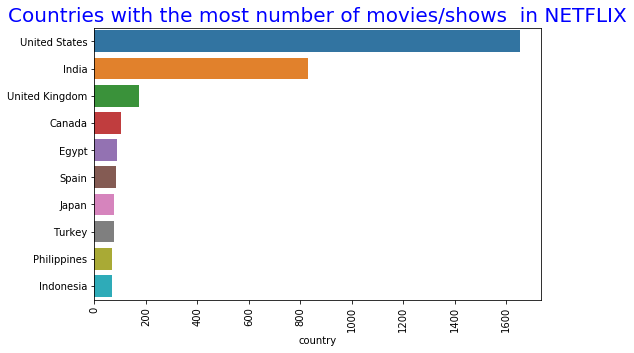

In [43]:
top10_countries = pd.DataFrame(netflix_dataset['country'].value_counts()).sort_values(by='country',ascending=False)[:10]
plot_data(top10_countries.country,top10_countries.index,'Countries with the most number of movies/shows  in NETFLIX')

In [147]:
netflix_dataset['country'].value_counts()[:10]

United States     1653
India              832
United Kingdom     174
Canada             104
Egypt               87
Spain               83
Turkey              76
Japan               76
Philippines         70
Indonesia           67
Name: country, dtype: int64

In [8]:
netflix_dataset['type'].value_counts()[:10]

Movie      4673
TV Show     135
Name: type, dtype: int64

What type of content 